# SIMULACIÓN MODELO GOMPERTZ

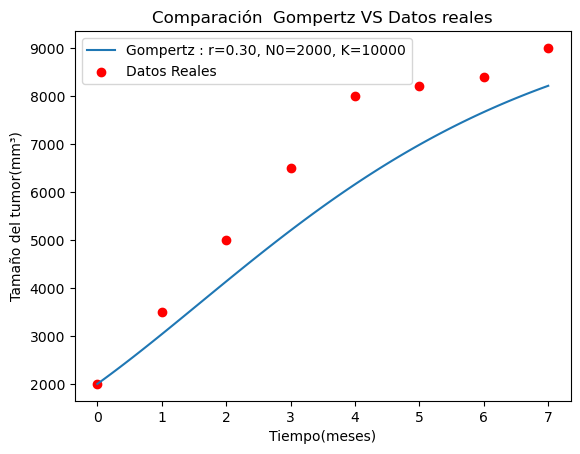

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# Definir los datos como arrays de NumPy
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000
# Función que representa la solucion de la ecuación diferencial del modelo Gompertz
def Gompertz(t, K, r):
    try:
        C = np.log(-np.log(volumen_mm3[0] / K))  # Usando el primer elemento de volumen_mm3 como t0
        N = K * np.exp(-np.exp(-r * t + C))
        return N
    except (ValueError, ZeroDivisionError):
        # Si se encuentra un error, se devuelve un valor alto para evitar el NaN
        return 1e6
# Condiciones iniciales
N0 =2000  # Tamaño inicial de la población

# Parámetros del modelo Gompertz verdaderos
r = 0.3
K = 10000

# Rango de tiempo
t_span = (0, 7)



# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = Gompertz(t_eval,K,r)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval,label=f'Gompertz : r={r:.2f}, N0={N0}, K={K}')

# Datos Reales (t, N)
import numpy as np



plt.scatter(meses,volumen_mm3, color='red', label='Datos Reales')

plt.xlabel('Tiempo(meses)')
plt.ylabel('Tamaño del tumor(mm³)')
plt.title('Comparación  Gompertz VS Datos reales')
plt.legend()
plt.savefig('Gompertz y datos reales.png')
# Mostrar la gráfica
plt.show()

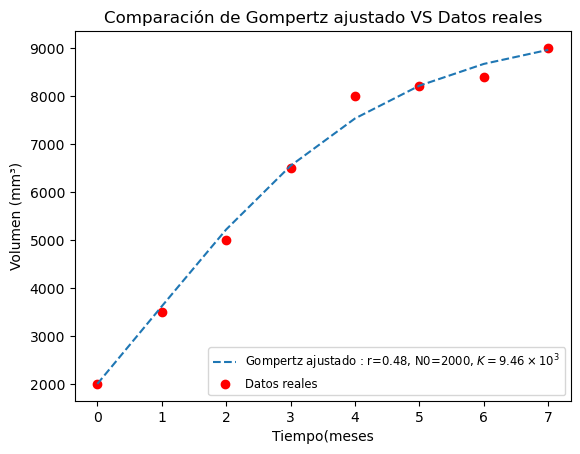

Parámetros ajustados (K, r): [9.45695971e+03 4.79959607e-01]


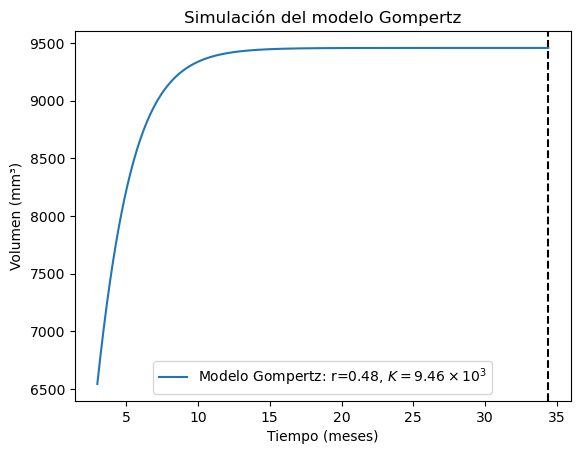

Valor de t donde N(t) se hace constante: 34.392339233923394


In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def Gompertz(t, K, r):
    try:
        C = np.log(-np.log(volumen_mm3[0] / K))  # Usando el primer elemento de volumen_mm3 como t0
        N = K * np.exp(-np.exp(-r * t + C))
        return N
    except (ValueError, ZeroDivisionError):
        # Si se encuentra un error, se devuelve un valor alto para evitar el NaN
        return 1e6

# Datos Reales (t, N)
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000

# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(Gompertz, meses, volumen_mm3, p0=[10000, 0.3], bounds=([1e-6, 0], [np.inf, np.inf]))
r=params[1]
K=params[0]
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(0, 7, 100)

# Generar la curva ajustada
fitted_curve = Gompertz(meses, *params)

# Visualizar los resultados
plt.plot(meses, fitted_curve,label=f'Gompertz ajustado : r={r:.2f}, N0={N0}, $K={K/1e3:.2f} \\times 10^3$', linestyle='--')
plt.scatter(meses, volumen_mm3, color='red', label='Datos reales')
plt.xlabel('Tiempo(meses')
plt.ylabel('Volumen (mm³)')
plt.title('Comparación de Gompertz ajustado VS Datos reales')
plt.legend(loc='lower right',fontsize='small')
plt.savefig('Gompertz ajustado y datos reales.png')
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados (K, r):", params)
t_eval = np.linspace(3, 100,10000)

# Inicializar listas para almacenar los resultados
N_values = []
t_values = []

# Iterar sobre los puntos de evaluación
for t in t_eval:
    # Calcular el valor de N(t) usando la función ajustada
    N_t = Gompertz(t, K, r)
    # Agregar el valor de N(t) y t a las listas
    N_values.append(N_t)
    t_values.append(t)
    # Detener la iteración si los últimos dos valores de N(t) son iguales
    if len(N_values) >= 2 and abs(N_values[-1] - K) < 0.001:
        # Graficar una línea negra punteada en el punto donde se alcanza el valor constante de N(t)
        plt.axvline(x=t, color='black', linestyle='--')
        break
# Visualizar los resultados
plt.plot(t_values, N_values, label=f'Modelo Gompertz: r={r:.2f}, $K={K/1e3:.2f} \\times 10^3$')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Volumen (mm³)')
plt.title('Simulación del modelo Gompertz')
plt.legend()
plt.savefig('Simulación del modelo Gompertz.png')
plt.show()

print("Valor de t donde N(t) se hace constante:", t)

